# **Loading the Required Packages**

**Torch package**

The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors.

**Torch cuda**

It is used to set up and run CUDA operations. It keeps track of the currently selected GPU, and all CUDA tensors you allocate will by default be created on that device.

**Torch utils**

TorchUtils is a Python package providing helpful utility APIs for the PyTorch projects.

**Torch nn**

This contains different classess that help to build neural network models.

**Torch funtional**

`The functional API of PyTorch is a powerful tool that enables you to write high-performance neural network models

**Torch optim**

torch.optim is a package implementing various optimization algorithms.

**Torchvision**

Torchvision provides additional functionalities to manipulate and process images with standard image processing algorithms. It has the computer vision models and datasets


1.   datasets:

        It has common datasets like MNIST, CIFAR10, ImageNet etc.

2.  transforms

       Torchvision supports common computer vision transformations in the torchvision.transforms and torchvision.transforms.v2 modules. Transforms can be used to transform or augment data for training or inference of different tasks (image classification, detection, segmentation, video classification).

**Torch Summary**

This can be used to print out the trainable and non-trainable parameters in a Keras-like manner for PyTorch models.

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
import albumentations as A
from albumentations.pytorch import ToTensorV2



train_transforms = A.Compose(
    [
        A.HorizontalFlip(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.CoarseDropout (max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16,
                         fill_value=.45, mask_fill_value = None),
        A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=15, p=0.4),
        A.RandomBrightnessContrast(p=0.5),

        A.Cutout(num_holes=1, max_h_size=16, max_w_size=16, always_apply=True),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
       # A.Cutout(num_holes=1, max_h_size=16, max_w_size=16, always_apply=True)
    ]
)
test_transforms = A.Compose(
    [
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
    ]
)
class Cifar10DS(datasets.CIFAR10):
    def __init__(self, root="./data", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label


train_data = Cifar10DS('../data', train=True, download=True, transform=train_transforms)
test_data = Cifar10DS('../data', train=False, download=True, transform=test_transforms)
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:03<00:00, 44954749.91it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Split


In [ ]:
#train_transforms, test_transforms = GetTrain_Transforms()

#train_data = datasets.CIFAR10(root='./data', train=True,
 #                                       download=True, transform=train_transforms)


#test_data = datasets.CIFAR10(root='./data', train=False,
                             #          download=True, transform=test_transforms)



In [ ]:
#batch_size = 512
#def GetLoadersValues(batch_size, shuffle = True, num_workers = 0, pin_memory = True):
 #   kwargs = {'batch_size': batch_size, 'shuffle': shuffle, 'num_workers': num_workers, 'pin_memory': pin_memory}

  #  test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
   # train_loader = torch.utils.data.DataLoader(test_data, **kwargs)
   # return test_loader, train_loader

In [ ]:
#test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
#train_loader = torch.utils.data.DataLoader(test_data, **kwargs)

In [3]:

# dataloader arguments - something you'll fetch these from cmdprmt

#test_loader, train_loader = GetLoadersValues(batch_size, shuffle = True, num_workers = 4, pin_memory = True) if cuda else GetLoadersValues(shuffle=True, batch_size=64)
batch_data, batch_label = next(iter(train_loader))

In [4]:
def Classes():
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return classes
classes =   Classes()

In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt

# train dataloader


# test dataloader



import matplotlib.pyplot as plt

def GetImageShow():
    fig = plt.figure()

    for i in range(12):
      plt.subplot(3,4,i+1)
      plt.tight_layout()
      plt.imshow(batch_data[i].squeeze(0), cmap='color')
      plt.title(batch_label[i].item())
      plt.xticks([])
      plt.yticks([])

CUDA Available? True


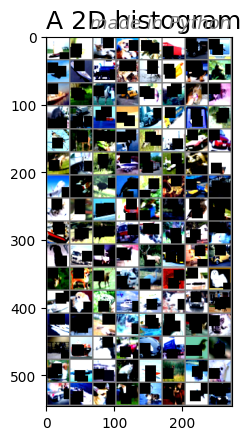

ship  bird  cat   dog   bird  truck truck plane plane ship  truck frog  bird  bird  dog   frog  ship  deer  horse truck horse horse dog   cat   cat   truck ship  plane car   truck frog  frog  bird  deer  frog  plane deer  truck car   car   horse cat   deer  ship  truck plane frog  ship  plane cat   bird  bird  frog  frog  plane truck cat   bird  ship  bird  bird  deer  bird  frog  ship  deer  deer  truck truck deer  horse cat   dog   truck truck dog   deer  car   dog   car   dog   dog   deer  truck bird  frog  ship  dog   ship  dog   frog  ship  car   dog   car   horse ship  frog  deer  deer  ship  cat   cat   frog  horse ship  horse car   car   truck bird  bird  dog   ship  truck cat   ship  deer  deer  dog   car   ship  dog   horse deer  cat   deer  car  


In [6]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.title("A 2D histogram", loc='left', fontsize=18)

# Second title
plt.title("made in Python", loc='right', fontsize=13, color='grey', style='italic')
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [7]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [8]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/Assignment10'
%cd $BASE_DIR

/content/drive/MyDrive/Assignment10


# The model
Let's start with the model we first saw

In [9]:
import model as Model

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model.ResNet().to(device)

summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [11]:
# Data to plot accuracy and loss graphs
def InitializeValues():
  train_losses = []
  test_losses = []
  train_acc = []
  test_acc = []

  test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}
  return train_losses, test_losses , train_acc, test_acc

In [12]:
import LR_Finder as LR
from torch.optim.lr_scheduler import OneCycleLR

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = OneCycleLR(optimizer, max_lr=0.015,epochs=5,steps_per_epoch=len(train_loader))
#EPOCHS = 24

#for epoch in range(EPOCHS):
 #   print("EPOCH:", epoch)
  #  train(model, device, train_loader, optimizer, epoch,)
   # scheduler.step()
    #test(model, device, test_loader)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LR.LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100, step_mode="exp")

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 2.85E-04


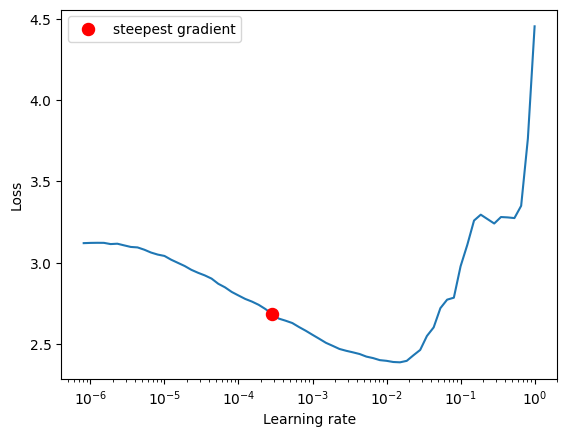

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.00028480358684358)

In [13]:
lr_finder.plot()

In [17]:
lr_finder.reset()
import train as train


In [27]:
import myest as t

In [28]:
# Define OneCycleLR scheduler

max_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(min(lr_finder.history['loss']))]

epochs = (0,5,24)
epochs = 24
lr = (max_lr* 1/10, max_lr, max_lr/10)

total_steps = len(train_loader) * epochs # For 10 epochs

train_losses = []
test_losses = []
train_acc = []
test_acc = []
steps_per_epoch = len(train_loader)
#cheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=total_steps)
scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=total_steps,
                       epochs=epochs, steps_per_epoch=steps_per_epoch,
                       pct_start=0.3, anneal_strategy='cos', cycle_momentum=True,
                       base_momentum=0.85, max_momentum=0.95, div_factor=25.0,
                       final_div_factor=10000.0, last_epoch=-1)
# Train the network using One Cycle Policy
for epoch in range(epochs):  # loop over the dataset multiple times
    train.train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    t.test(model, device, test_loader, criterion, test_losses, test_acc)
    scheduler.step()


Train: Loss=1.0424 Batch_id=390 Accuracy=62.43: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]


Test set: Average loss: 0.8447, Accuracy: 7131/10000 (71.31%)



Train: Loss=1.0196 Batch_id=390 Accuracy=64.39: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]


Test set: Average loss: 0.8587, Accuracy: 7071/10000 (70.71%)



Train: Loss=0.9765 Batch_id=390 Accuracy=65.42: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]


Test set: Average loss: 0.7811, Accuracy: 7284/10000 (72.84%)



Train: Loss=0.8533 Batch_id=390 Accuracy=66.44: 100%|██████████| 391/391 [00:22<00:00, 17.25it/s]


Test set: Average loss: 0.8380, Accuracy: 7185/10000 (71.85%)



Train: Loss=0.9615 Batch_id=390 Accuracy=67.24: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]


Test set: Average loss: 0.7646, Accuracy: 7300/10000 (73.00%)



Train: Loss=0.7379 Batch_id=390 Accuracy=68.01: 100%|██████████| 391/391 [00:23<00:00, 16.42it/s]


Test set: Average loss: 0.6684, Accuracy: 7750/10000 (77.50%)



Train: Loss=0.8438 Batch_id=390 Accuracy=68.41: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]


Test set: Average loss: 0.6505, Accuracy: 7774/10000 (77.74%)



Train: Loss=0.9368 Batch_id=390 Accuracy=69.22: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]


Test set: Average loss: 0.6077, Accuracy: 7942/10000 (79.42%)



Train: Loss=0.7909 Batch_id=390 Accuracy=69.61: 100%|██████████| 391/391 [00:23<00:00, 16.64it/s]


Test set: Average loss: 0.6819, Accuracy: 7688/10000 (76.88%)



Train: Loss=0.7853 Batch_id=390 Accuracy=69.92: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]


Test set: Average loss: 0.6314, Accuracy: 7844/10000 (78.44%)



Train: Loss=1.0237 Batch_id=390 Accuracy=70.32: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]


Test set: Average loss: 0.6526, Accuracy: 7780/10000 (77.80%)



Train: Loss=0.7946 Batch_id=390 Accuracy=71.08: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]


Test set: Average loss: 0.5983, Accuracy: 7981/10000 (79.81%)



Train: Loss=0.8175 Batch_id=390 Accuracy=71.23: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]


Test set: Average loss: 0.5363, Accuracy: 8179/10000 (81.79%)



Train: Loss=0.8663 Batch_id=390 Accuracy=71.51: 100%|██████████| 391/391 [00:23<00:00, 16.56it/s]


Test set: Average loss: 0.5670, Accuracy: 8035/10000 (80.35%)



Train: Loss=0.9189 Batch_id=390 Accuracy=71.36: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]


Test set: Average loss: 0.5850, Accuracy: 7994/10000 (79.94%)



Train: Loss=0.7237 Batch_id=390 Accuracy=71.43: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]


Test set: Average loss: 0.5633, Accuracy: 8075/10000 (80.75%)



Train: Loss=1.0214 Batch_id=390 Accuracy=72.03: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]


Test set: Average loss: 0.5351, Accuracy: 8181/10000 (81.81%)



Train: Loss=0.7924 Batch_id=390 Accuracy=72.14: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]


Test set: Average loss: 0.5862, Accuracy: 8005/10000 (80.05%)



Train: Loss=0.8028 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]


Test set: Average loss: 0.5371, Accuracy: 8196/10000 (81.96%)



Train: Loss=0.8953 Batch_id=390 Accuracy=72.39: 100%|██████████| 391/391 [00:23<00:00, 16.36it/s]


Test set: Average loss: 0.5873, Accuracy: 8034/10000 (80.34%)



Train: Loss=0.7105 Batch_id=390 Accuracy=72.00: 100%|██████████| 391/391 [00:23<00:00, 16.88it/s]


Test set: Average loss: 0.5505, Accuracy: 8199/10000 (81.99%)



Train: Loss=0.9703 Batch_id=390 Accuracy=72.30: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]


Test set: Average loss: 0.5022, Accuracy: 8250/10000 (82.50%)



Train: Loss=0.8978 Batch_id=390 Accuracy=72.60: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]


Test set: Average loss: 0.5694, Accuracy: 8095/10000 (80.95%)



Train: Loss=0.7760 Batch_id=390 Accuracy=72.80: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]


Test set: Average loss: 0.5011, Accuracy: 8328/10000 (83.28%)



In [ ]:
print('Finished Training')

# Plot learning rate and momentum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates)
plt.xlabel('Training Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')

plt.subplot(1, 2, 2)
plt.plot(momentums)
plt.xlabel('Training Step')
plt.ylabel('Momentum')
plt.title('Momentum Schedule')

plt.tight_layout()
plt.show()
